<a href="https://colab.research.google.com/github/SarthoPramanik1075/Machine-Learning-/blob/main/decisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
)


plt.rcParams["figure.figsize"] = (7,5)

In [ ]:
#Create a small synthetic dataset
data = {
    'Weather': ['Sunny', 'Rainy', 'Sunny', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Rainy'],
    'Windy':   [0,        1,       0,        1,        0,        1,        0,       1],
    'Play':    [1,        0,       1,        1,        0,        0,        1,       0]
}

df_synthetic = pd.DataFrame(data)
df_synthetic

,Weather,Windy,Play
0,Sunny,0,1
1,Rainy,1,0
2,Sunny,0,1
3,Sunny,1,1
4,Rainy,0,0
5,Rainy,1,0
6,Sunny,0,1
7,Rainy,1,0


In [ ]:
df_synthetic['Weather_num']=df_synthetic['Weather'].map({'Sunny': 1, 'Rainy': 0})
X_syn = df_synthetic[['Weather_num', 'Windy']]
Y_syn = df_synthetic[['Play']]
print(X_syn)
print(Y_syn)

   Weather_num  Windy
0            1      0
1            0      1
2            1      0
3            1      1
4            0      0
5            0      1
6            1      0
7            0      1
   Play
0     1
1     0
2     1
3     1
4     0
5     0
6     1
7     0


In [ ]:
tree_syn=DecisionTreeClassifier(max_depth=3, random_state=42)
tree_syn.fit(X_syn, Y_syn)
tree_syn

DecisionTreeClassifier(max_depth=3, random_state=42)

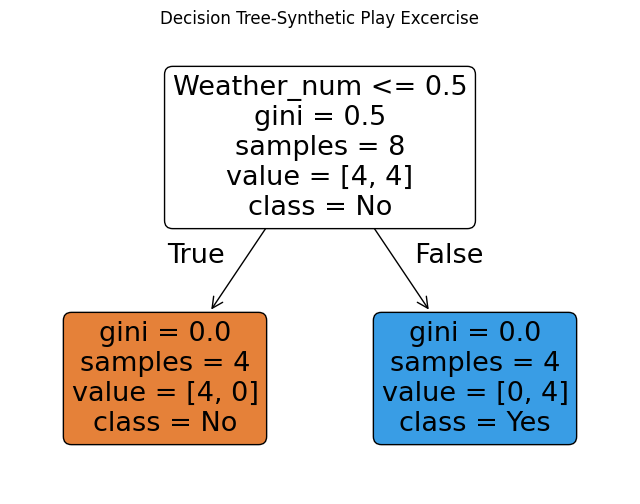

In [ ]:
plt.figure(figsize=(8,6))
plot_tree(
    tree_syn,
    feature_names=['Weather_num', 'Windy'],
    class_names=['No', 'Yes'],
    filled = True,
    rounded=True,
)
plt.title("Decision Tree-Synthetic Play Excercise")
plt.show()

In [ ]:
example_1=pd.DataFrame([[1,0]], columns=['Weather_num', 'Windy'])
pred_1=tree_syn.predict(example_1)[0]
print('Sunny, not windy -> Play prediction', pred_1)


example_2=pd.DataFrame([[0,1]], columns=['Weather_num', 'Windy'])
pred_2=tree_syn.predict(example_2)[0]
print('Sunny, not windy -> Play prediction', pred_2)

Sunny, not windy -> Play prediction 1
Sunny, not windy -> Play prediction 0


In [ ]:
from sklearn.datasets import make_classification

X_big, Y_big = make_classification(
    n_samples=400,
    n_features=5,
    n_informative=3,
    n_redundant=0,
    n_classes=2,
    random_state=42,
)

X_train_big, X_test_big, Y_train_big, Y_test_big = train_test_split(
    X_big, Y_big, test_size=0.3, random_state=42,
)

X_train_big.shape, X_test_big.shape, Y_train_big.shape, Y_test_big.shape

((280, 5), (120, 5), (280,), (120,))

In [ ]:
deep_tree = DecisionTreeClassifier(random_state=4)
deep_tree.fit(X_train_big, Y_train_big)
pruned_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
pruned_tree.fit(X_train_big, Y_train_big)

Y_train_pred_deep = deep_tree.predict(X_train_big)
Y_test_pred_deep = deep_tree.predict(X_test_big)

Y_train_pred_pruned = pruned_tree.predict(X_train_big)
Y_test_pred_pruned = pruned_tree.predict(X_test_big)

print("Deep tree - train accuracy: " , round(accuracy_score(Y_train_big, Y_train_pred_deep), 3))
print("Deep tree - test accuracy: " , round(accuracy_score(Y_test_big, Y_test_pred_deep), 3))
print()
print("Pruned tree - train accuracy: " , round(accuracy_score(Y_train_big, Y_train_pred_pruned), 3))
print("Pruned tree - test accuracy: " , round(accuracy_score(Y_test_big, Y_test_pred_pruned), 3))

Deep tree - train accuracy:  1.0
Deep tree - test accuracy:  0.875

Pruned tree - train accuracy:  0.904
Pruned tree - test accuracy:  0.892


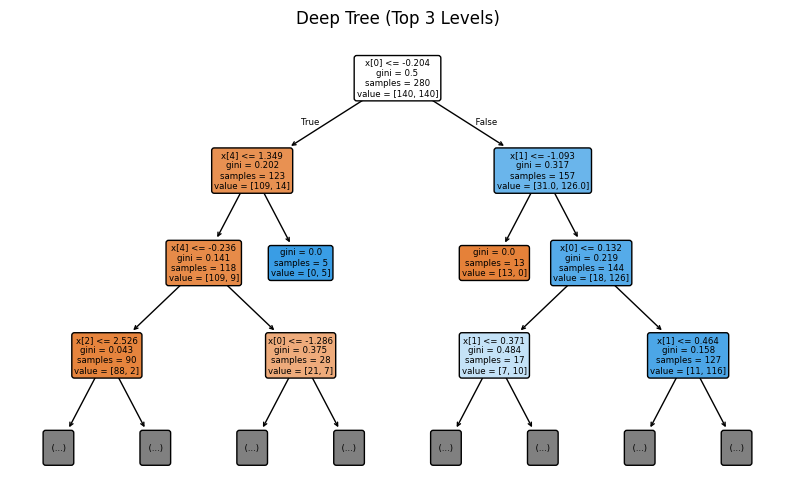

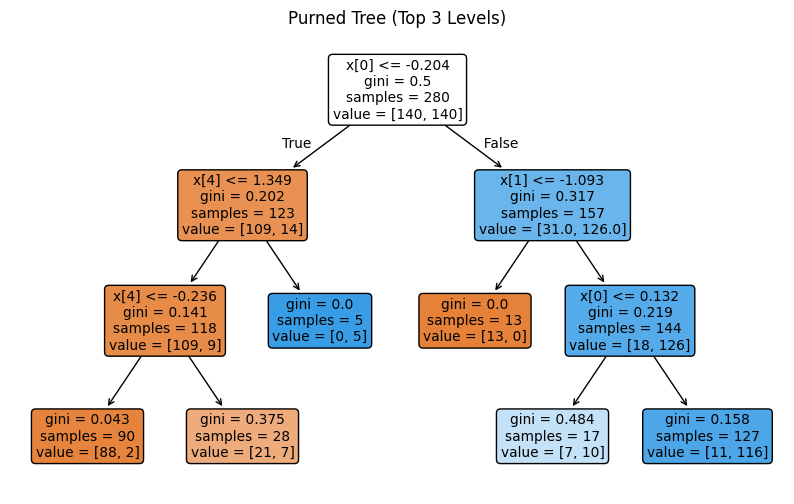

In [ ]:
plt.figure(figsize=(10,6))
plot_tree(deep_tree, filled=True, rounded=True, max_depth=3)
plt.title("Deep Tree (Top 3 Levels)")
plt.show()


plt.figure(figsize=(10,6))
plot_tree(pruned_tree, filled=True, rounded=True, max_depth=3)
plt.title("Purned Tree (Top 3 Levels)")
plt.show()